In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import linregress


washington_weather_df = pd.read_csv("../Group Project 1/WashingtonDataCenter.csv")
washington_weather_df.head(10)

,Date,Max Temp,Avg Temp,Min Temp
0,Aug-13,84.2,71.6,46.4
1,Jan-14,35.6,28.4,19.4
2,Aug-14,86.0,71.6,48.2
3,Jan-15,39.2,32.0,21.2
4,Aug-15,87.8,75.2,51.8
5,Jan-16,35.6,28.4,17.6
6,Aug-16,86.0,75.2,51.8
7,17-Jan,28.4,17.6,3.2
8,17-Aug,91.4,78.8,53.6
9,18-Jan,39.2,33.8,24.8


In [2]:
iceland_weather_df = pd.read_csv("../Group Project 1/Reykjavik Iceland Data Center.csv")
iceland_weather_df.head(10)

,Date,Max Temp,Avg Temp,Min Temp
0,Jan-11,33.8,33.8,30.2
1,Aug-11,57.2,53.6,46.4
2,Jan-12,35.6,32.0,28.4
3,Aug-12,59.0,55.4,10.0
4,Jan-13,37.4,35.6,33.8
5,Aug-13,53.6,51.8,46.4
6,Jan-14,37.4,35.6,32.0
7,Aug-14,57.2,53.6,48.2
8,Jan-15,33.8,32.0,28.4
9,Aug-15,57.2,53.6,48.2


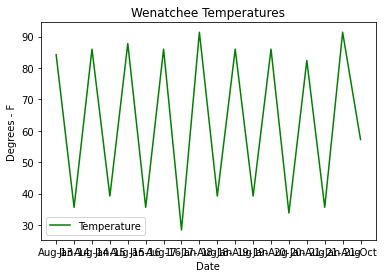

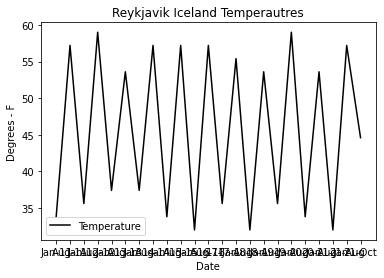

In [10]:
dates = washington_weather_df["Date"]
MaxTemp = washington_weather_df["Max Temp"]

plt.plot(dates, MaxTemp, color="green", label="Temperature")
plt.legend(loc="best")
plt.title("Wenatchee Temperatures")
plt.xlabel("Date")
plt.ylabel("Degrees - F")
plt.show()

dates = iceland_weather_df["Date"]
MaxTemp = iceland_weather_df["Max Temp"]

plt.plot(dates, MaxTemp, color="black", label="Temperature")
plt.legend(loc="best")
plt.title("Reykjavik Iceland Temperautres")
plt.xlabel("Date")
plt.ylabel("Degrees - F")
plt.show()